In [311]:

"""Create a synthetic dataset of 20,000 rows and 50 features, where:

30% of the rows contain missing data in at least 5 features.

5 features have multicollinearity with others.

10 features contain non-linear relationships with the target variable.

Provide a Python script to:
Handle missing data effectively while preserving information.

Detect and mitigate multicollinearity.

Transform non-linear relationships into a linear format suitable for modeling.

Explain your decisions and how they would affect downstream tasks.  """


'Create a synthetic dataset of 20,000 rows and 50 features, where:\n\n30% of the rows contain missing data in at least 5 features.\n\n5 features have multicollinearity with others.\n\n10 features contain non-linear relationships with the target variable.\n\nProvide a Python script to:\nHandle missing data effectively while preserving information.\n\nDetect and mitigate multicollinearity.\n\nTransform non-linear relationships into a linear format suitable for modeling.\n\nExplain your decisions and how they would affect downstream tasks.'

In [312]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [313]:
# Step 1: Create Synthetic Dataset
np.random.seed(42)
X, y = make_regression(n_samples=20000, n_features=50, noise=0.1)
X.shape , y.shape

((20000, 50), (20000,))

In [314]:


# Convert to DataFrame
df = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(50)])
df['target'] = y  
df.head()



,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,target
0,2.937297,0.174219,-1.001396,0.784468,-1.893891,-1.605527,-1.054057,-0.854072,-0.930664,0.628379,...,-0.804242,-0.526236,-0.401576,-0.492581,0.266294,-0.099889,1.132839,-1.395503,-0.492461,136.276276
1,-0.003294,-0.148728,-0.466775,-1.375171,1.342591,-0.961027,-0.354658,0.206591,-0.584841,0.276060,...,0.433200,-0.484606,-0.761235,-2.136368,0.277395,2.792509,0.217026,-1.269125,-2.045623,486.256903
2,1.098161,-2.440726,0.024910,0.386766,-0.065601,0.646268,0.887969,0.023325,0.052634,0.447759,...,0.510750,0.923237,-0.479621,-1.431625,-0.713615,-0.728936,-0.920463,1.116624,-0.785548,257.480176
3,-0.227440,1.296617,0.035813,-0.128025,-0.073255,0.207276,-0.279057,-1.402057,1.148075,-0.815360,...,-0.972111,1.776478,0.378521,0.320201,-0.941110,-1.026439,0.587089,-0.420693,-0.549260,-271.356923
4,1.334184,1.174020,0.009432,-0.553529,0.345830,-0.429791,0.161693,0.069515,-1.100602,-2.323850,...,-1.323957,-1.087017,-1.423568,-0.127241,0.540708,0.577193,-0.381797,-0.157766,0.684262,55.197927


In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   20000 non-null  float64
 1   feature_2   20000 non-null  float64
 2   feature_3   20000 non-null  float64
 3   feature_4   20000 non-null  float64
 4   feature_5   20000 non-null  float64
 5   feature_6   20000 non-null  float64
 6   feature_7   20000 non-null  float64
 7   feature_8   20000 non-null  float64
 8   feature_9   20000 non-null  float64
 9   feature_10  20000 non-null  float64
 10  feature_11  20000 non-null  float64
 11  feature_12  20000 non-null  float64
 12  feature_13  20000 non-null  float64
 13  feature_14  20000 non-null  float64
 14  feature_15  20000 non-null  float64
 15  feature_16  20000 non-null  float64
 16  feature_17  20000 non-null  float64
 17  feature_18  20000 non-null  float64
 18  feature_19  20000 non-null  float64
 19  feature_20  20000 non-nul

In [316]:
# Introduce Missing Data (30% of the rows contain missing data in at least 5 features.)

col_num = np.random.randint(0,15, 7)
for col in col_num:
    na_ind = np.random.randint(0,20000, int(20000*0.3))
    df.iloc[na_ind,col] = np.nan

df.isnull().sum()

feature_1        0
feature_2        0
feature_3        0
feature_4        0
feature_5        0
feature_6        0
feature_7     9029
feature_8     9050
feature_9        0
feature_10       0
feature_11    5186
feature_12    5152
feature_13       0
feature_14       0
feature_15    5178
feature_16       0
feature_17       0
feature_18       0
feature_19       0
feature_20       0
feature_21       0
feature_22       0
feature_23       0
feature_24       0
feature_25       0
feature_26       0
feature_27       0
feature_28       0
feature_29       0
feature_30       0
feature_31       0
feature_32       0
feature_33       0
feature_34       0
feature_35       0
feature_36       0
feature_37       0
feature_38       0
feature_39       0
feature_40       0
feature_41       0
feature_42       0
feature_43       0
feature_44       0
feature_45       0
feature_46       0
feature_47       0
feature_48       0
feature_49       0
feature_50       0
target           0
dtype: int64

[20 22 19 18 17 19]


<Axes: >

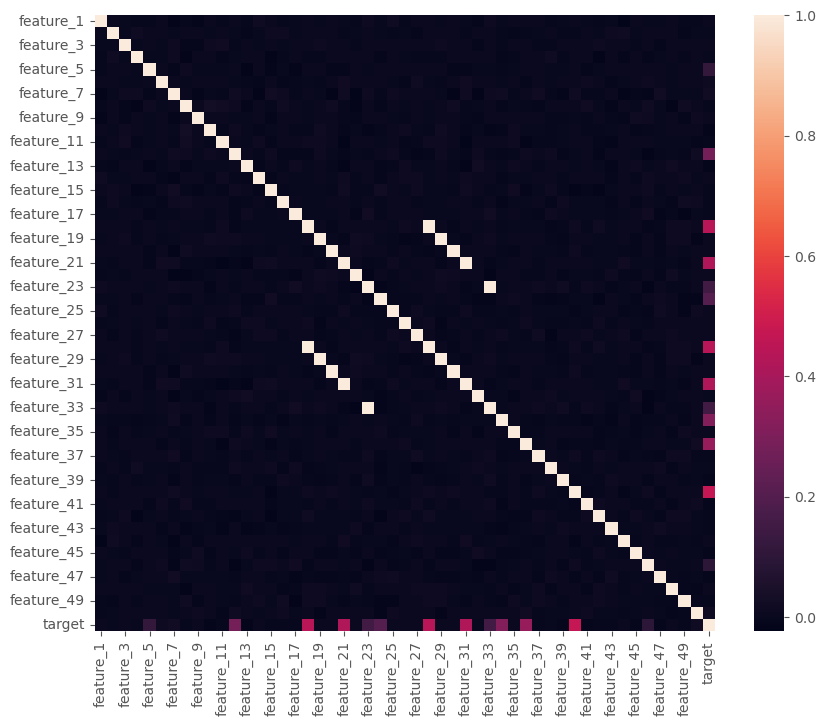

In [317]:
# Add Multicollinearity

col_num = np.random.randint(15,30, 6)
print(col_num)
for col in col_num:
    df.iloc[:,col] = df.iloc[:, col+10]

plt.style.use("ggplot")
plt.figure(figsize=[10,8])
sns.heatmap(df.corr())

non_linear_list [31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


<Axes: >

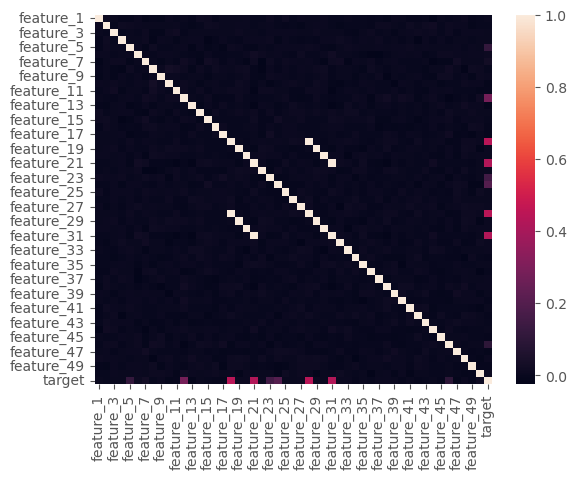

In [318]:

# Add Non-linear Relationships
non_linear_list = []
for col in range(31,41):
    non_linear_list.append(col)
    df.iloc[:,col] =  np.cos(df.iloc[:, col+10]) + 0.5 * df.iloc[:, col+10]**2 + np.random.normal(0, 100, 20000) 
print("non_linear_list",non_linear_list)
sns.heatmap(df.corr())

In [319]:
df.iloc[:,1].isnull().sum()>0

False

In [320]:
# Step 2: Handle Missing Data
missing_val_col = [i for i in range(50) if df.iloc[:,i].isnull().sum()>0]

print(missing_val_col)
imputer = SimpleImputer(strategy='mean')
df.iloc[:,missing_val_col] = imputer.fit_transform(df.iloc[:,missing_val_col])
df.isnull().sum()

[6, 7, 10, 11, 14]


feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
feature_31    0
feature_32    0
feature_33    0
feature_34    0
feature_35    0
feature_36    0
feature_37    0
feature_38    0
feature_39    0
feature_40    0
feature_41    0
feature_42    0
feature_43    0
feature_44    0
feature_45    0
feature_46    0
feature_47    0
feature_48    0
feature_49    0
feature_50    0
target        0
dtype: int64

In [321]:
# Step 3: Detect and Mitigate Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

# Calculate VIF
vif = calculate_vif(df_imputed.iloc[:, :-1])

# Drop Features with High VIF (>10)
high_vif_features = vif[vif["VIF"] > 10]["feature"].tolist()
df_no_multicollinearity = df_imputed.drop(columns=high_vif_features)
high_vif_features

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


['feature_16',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_26',
 'feature_29',
 'feature_30',
 'feature_31']

In [322]:
# Step 4: Transform Non-linear Relationships

poly_features = PolynomialFeatures(degree=2, include_bias=False)
non_linear_features = df.iloc[:,non_linear_list].columns
poly_transformed = pd.DataFrame(poly_features.fit_transform(df_no_multicollinearity[non_linear_features]),
                                columns=poly_features.get_feature_names_out(non_linear_features))


df_transformed = df_no_multicollinearity.drop(columns=non_linear_features)
df_final = pd.concat([df_transformed, poly_transformed], axis=1)


print("Final Dataset Shape:", df_final.shape)

Final Dataset Shape: (20000, 98)


In [323]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,target
0,2.937297,0.174219,-1.001396,0.784468,-1.893891,-1.605527,-1.054057,-0.010251,-0.930664,0.628379,...,-0.804242,-0.526236,-0.401576,-0.492581,0.266294,-0.099889,1.132839,-1.395503,-0.492461,136.276276
1,-0.003294,-0.148728,-0.466775,-1.375171,1.342591,-0.961027,-0.354658,0.206591,-0.584841,0.276060,...,0.433200,-0.484606,-0.761235,-2.136368,0.277395,2.792509,0.217026,-1.269125,-2.045623,486.256903
2,1.098161,-2.440726,0.024910,0.386766,-0.065601,0.646268,-0.004755,0.023325,0.052634,0.447759,...,0.510750,0.923237,-0.479621,-1.431625,-0.713615,-0.728936,-0.920463,1.116624,-0.785548,257.480176
3,-0.227440,1.296617,0.035813,-0.128025,-0.073255,0.207276,-0.279057,-1.402057,1.148075,-0.815360,...,-0.972111,1.776478,0.378521,0.320201,-0.941110,-1.026439,0.587089,-0.420693,-0.549260,-271.356923
4,1.334184,1.174020,0.009432,-0.553529,0.345830,-0.429791,-0.004755,-0.010251,-1.100602,-2.323850,...,-1.323957,-1.087017,-1.423568,-0.127241,0.540708,0.577193,-0.381797,-0.157766,0.684262,55.197927
